# Import e Conhecendo os dados

In [ ]:
# Importação das bibliotecas
from google.colab import files

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [ ]:
# Upload do arquivo
uploaded = files.upload()

# Leitura e ajuste dos dados
df = pd.read_csv('Data Science Jobs Salaries.csv')
df['work_year'] = df['work_year'].str.replace('2021e','2021').astype(int)
df['company_size'] = pd.Categorical(df.company_size, categories=list('SML') , ordered=True)
df['experience_level'] = pd.Categorical(df.experience_level, categories=['EN','MI','SE','EX'], ordered=True)


df.head()

Saving Data Science Jobs Salaries.csv to Data Science Jobs Salaries.csv


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [ ]:
# Preview da qualidade dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           245 non-null    int64   
 1   experience_level    245 non-null    category
 2   employment_type     245 non-null    object  
 3   job_title           245 non-null    object  
 4   salary              245 non-null    int64   
 5   salary_currency     245 non-null    object  
 6   salary_in_usd       245 non-null    int64   
 7   employee_residence  245 non-null    object  
 8   remote_ratio        245 non-null    int64   
 9   company_location    245 non-null    object  
 10  company_size        245 non-null    category
dtypes: category(2), int64(4), object(5)
memory usage: 18.2+ KB


# Amostragem



![img](https://www.questionpro.com/blog/wp-content/uploads/2018/03/Amostragem-1-2.jpg)

#### População

In [ ]:
# Todos os dados possíveis
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


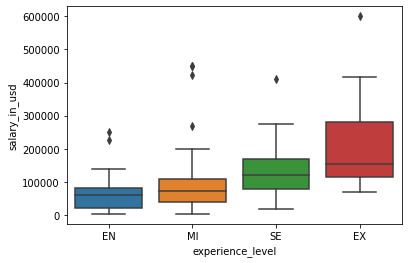

In [ ]:
# Boxplot dos salários por nível de experiência
sns.boxplot(data=df,x='experience_level', y='salary_in_usd')

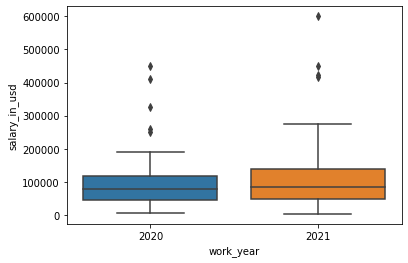

In [ ]:
# Boxplot dos salários por ano de coleta dos dados
sns.boxplot(data=df,x='work_year', y='salary_in_usd')

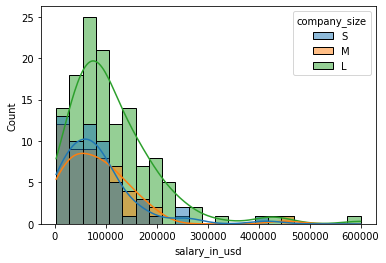

In [ ]:
# Histograma dos salários pelo tamanho da empresa
sns.histplot(data=df,x='salary_in_usd',hue = 'company_size',kde=True)

![](https://nova-escola-producao.s3.amazonaws.com/FQFG2d57rDf26ty9HRkacBCHY6V8VyJWmapgunh3MA6scbB29rSYw5TtazwJ/sistematizacao-do-conceito)

#### Amostragem Simples 

In [ ]:
# Amostrando simples usando o random_state
sample_simp = df.sample(5,random_state= 0)
sample_simp

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
92,2020,MI,FT,Lead Data Scientist,115000,USD,115000,AE,0,AE,L
238,2021,MI,FT,Data Engineer,24000,EUR,28608,MT,50,MT,L
73,2021,MI,FT,Data Analyst,93000,USD,93000,US,100,US,L
55,2021,MI,FT,Data Analyst,37456,GBP,51814,GB,50,GB,L
181,2021,MI,FT,Research Scientist,48000,EUR,57217,FR,50,FR,S


In [ ]:
# Amostrando simples usando o seed
np.random.seed(0)
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
92,2020,MI,FT,Lead Data Scientist,115000,USD,115000,AE,0,AE,L
238,2021,MI,FT,Data Engineer,24000,EUR,28608,MT,50,MT,L
73,2021,MI,FT,Data Analyst,93000,USD,93000,US,100,US,L
55,2021,MI,FT,Data Analyst,37456,GBP,51814,GB,50,GB,L
181,2021,MI,FT,Research Scientist,48000,EUR,57217,FR,50,FR,S


In [ ]:
# Quantidade de classes distintas na amostra
df['salary_currency'].sample(15, random_state=123).value_counts(normalize=True)

USD    0.466667
INR    0.133333
CAD    0.133333
DKK    0.066667
JPY    0.066667
GBP    0.066667
EUR    0.066667
Name: salary_currency, dtype: float64

In [ ]:
# Verificando todos os tipos de salário
df['salary_currency'].value_counts().index

Index(['USD', 'EUR', 'INR', 'GBP', 'CAD', 'TRY', 'PLN', 'HUF', 'SGD', 'MXN',
       'DKK', 'BRL', 'CLP', 'JPY', 'CNY'],
      dtype='object')

#### Amostragem Sistemática 

In [ ]:
# Amostragem sistemática com passo e primeiro valor definidos
passo = 25
inicial = 132
indices = np.arange(inicial,df.shape[0],passo)
amostra = df.loc[indices]
amostra


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
132,2021,SE,FT,Data Scientist,135000,USD,135000,US,0,US,L
157,2021,EN,FT,Data Science Consultant,90000,USD,90000,US,100,US,S
182,2021,MI,FT,Machine Learning Engineer,21000,EUR,25032,SI,50,SI,L
207,2021,MI,FT,Machine Learning Engineer,74000,USD,74000,JP,50,JP,S
232,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M


#### Amostragem Estratificada 

In [ ]:
# Verificando quantos tipos diferentes de classe temos na amostra
df['experience_level'].value_counts()

MI    103
SE     77
EN     54
EX     11
Name: experience_level, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Amostragem estratificada usando train_test_split
X_1, X_2 = train_test_split(df, test_size = 10 #Tamanho da amostra X_2 - Amostra alvo
                            , stratify = df['experience_level'])
X_2['experience_level'].value_counts()

MI    4
SE    3
EN    2
EX    1
Name: experience_level, dtype: int64

In [ ]:
X_1['experience_level'].value_counts()

MI    99
SE    74
EN    52
EX    10
Name: experience_level, dtype: int64

#### Amostragem Clusterizada 

In [ ]:
# Amostragem clusterizada selecionando apenas os seniores
amostra = df[df.experience_level=='SE'].sample(frac=0.1)
amostra

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
9,2021,SE,FT,Data Science Engineer,159500,CAD,127543,CA,50,CA,L
210,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,100,US,S
244,2021,SE,FT,Data Science Manager,7000000,INR,94917,IN,50,IN,L
50,2021,SE,FT,Machine Learning Engineer,80000,EUR,95362,DE,50,DE,L
138,2021,SE,FT,Research Scientist,120500,CAD,96357,CA,50,CA,L
134,2021,SE,FT,Data Science Manager,4000000,INR,54238,IN,50,US,L
86,2021,SE,FT,Big Data Architect,125000,CAD,99956,CA,50,CA,M
202,2020,SE,FT,Data Scientist,120000,USD,120000,US,50,US,L


# Distribuição Normal


<img alt="Correlação" width="85%" src="https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png">


p = 0.890035
H0 não pode ser rejeitado


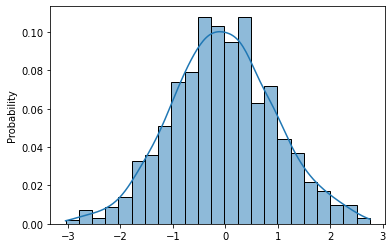

In [ ]:
# Testando a função normaltest em dados que com certeza são normais

np.random.seed(0) # Gera a semente aleatória
normal_points = np.random.normal(0,1,10**3) # gera 10**3 pontos dentro de uma distribuição normal
sns.histplot(x= normal_points,kde=True,stat='probability') # Plota a distripuição dos dados

k2, p = stats.normaltest(normal_points) # Realiza o teste normal
alpha = 1e-3 # Probabilidade limite - caso o p (probabilidade do teste ser verdade) for menor que esse valor, então a hipótese nula pode ser rejeitada


print("p = {:g}".format(p))
#p = 0.890035
if p < alpha:  # H0: os dados seguem uma distribuição normal
    print("H0 pode ser rejeitado")
else:
    print("H0 não pode ser rejeitado")

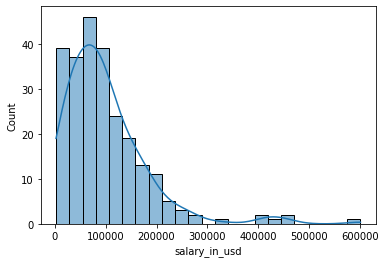

In [ ]:
# Visualizando a distribuição dos salários
sns.histplot(data=df,x='salary_in_usd',kde=True)

In [ ]:
k2, p = stats.normaltest(df.salary_in_usd)
print("p = {:g}".format(p))
if p < alpha:  # H0: os dados seguem uma distribuição normal
    print("H0 pode ser rejeitado")
else:
    print("H0 não pode ser rejeitado")

p = 1.39497e-31
H0 pode ser rejeitado


# Intervalo de confiança

<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





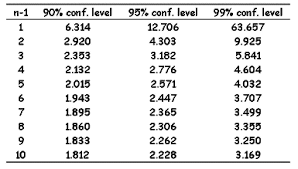

![](https://www.statisticshowto.com/wp-content/uploads/2021/12/confidence-limits.bmp)

In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 25 amostras -> Teste T
amostra = df.sample(25, random_state=0)
confidence = 0.95
dof = amostra.shape[0]-1

interval = stats.t.interval(alpha=confidence, df=dof, loc=amostra.salary_in_usd.mean(), scale = stats.sem(amostra.salary_in_usd))
interval

(41088.60815163888, 116269.71184836113)

In [ ]:
# Verificando a média da população
df.salary_in_usd.mean()

99868.01224489795

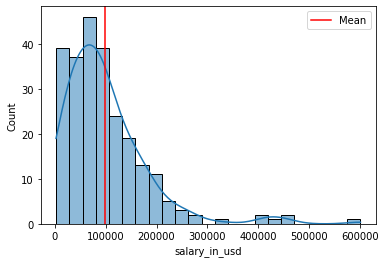

In [ ]:
# Visualizando a distribuição dos dados como ele são
sns.histplot(data=df,x='salary_in_usd',kde=True)
plt.axvline(df.salary_in_usd.mean(),0, 40,c='Red', label='Mean')
plt.legend()

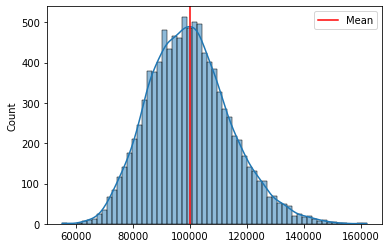

In [ ]:
# Visualizando a distribuição dos dados aplicando o teorema do limite central
val_list = []
for i in range(10000):
  val_list.append(df.sample(30).salary_in_usd.mean())

sns.histplot(val_list,kde=True)
plt.axvline(np.array(val_list).mean(),0, 40,c='Red', label='Mean')
plt.legend()

In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal
amostra = df.sample(50, random_state=0)
confidence = 0.95

interval = stats.norm.interval(alpha=confidence, loc=amostra.salary_in_usd.mean(), scale = stats.sem(amostra.salary_in_usd))
interval


(71889.18259929774, 118278.77740070225)

In [ ]:
# Verificando a média da população
df.salary_in_usd.mean()

99868.01224489795